<a href="https://colab.research.google.com/github/FelicianoRobles/FisicaComputacional1/blob/master/Evaluacion3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [224]:
import numpy as np
from scipy import sparse
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm

# Problema 1:

Resuelve numéricamente la ecuación de reacción-difusión para el caso de condiciones de frontera tipo Dirichlet por el método de BTCS, con condición inicial $u(x,0)=0$, y condiciones a la frontera $u(0,t)=1$ y $u(1,t)=2$, para un tiempo $t=0,..,1$.

Muestra una gráfica de la evolución temporal de la reacción difusión de los compuestos.

True


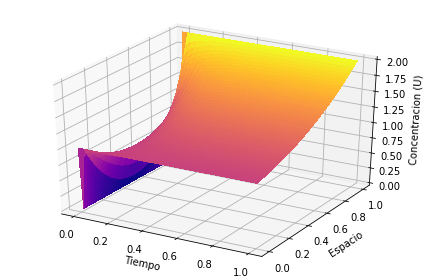

In [233]:
#http://people.bu.edu/andasari/courses/numericalpython/Week9Lecture15/PythonFiles/BTCS_DirichletBCs.py#
'''
Backward method to solve 1D reaction-diffusion equation:
    u_t = D * u_xx + alpha * u
    
with Dirichlet boundary conditions u(x0,t) = 0, u(xL,t) = 0
and initial condition u(x,0) = 4*x - 4*x**2
'''
M = 50 # GRID POINTS on space interval
N = 60 # GRID POINTS on time interval

x0 = 0 # Posicion inicial
xL = 1 # Posicion final (longitud)

# ----- Spatial discretization step -----
dx = (xL - x0)/(M - 1)

t0 = 0 # Tiempo inicial
tF = 1 # Tiempo final

# ----- Time step -----
dt = (tF - t0)/(N - 1)

D = 1  # Coeficiente de difusion
alpha = -1 # Coeficiente de reaccion

r = dt*D/dx**2
s = dt*alpha;

xspan = np.linspace(x0, xL, M)
tspan = np.linspace(t0, tF, N)

main_diag = (1 + 2*r - s)*np.ones((1,M-2))
off_diag = -r*np.ones((1, M-3))

a = main_diag.shape[1]

diagonals = [main_diag, off_diag, off_diag]

A = sparse.diags(diagonals, [0,-1,1], shape=(a,a)).toarray()

# ----- Initializes matrix U -----
U = np.zeros((M, N))

# ----- Condicion inicial -----
U[:,0] = 0 # u(x,0)

# ----- Condiciones de frontera de Dirichlet -----
U[0,:] = 1.0 # u(0,t)
U[-1,:] = 2.0 # u(1,t)

for k in range(1, N):
    c = np.zeros((M-4,1)).ravel()
    b1 = np.asarray([r*U[0,k], r*U[-1,k]])
    b1 = np.insert(b1, 1, c)
    b2 = np.array(U[1:M-1, k-1])
    b = b1 + b2  # Mano derecha
    U[1:M-1, k] = np.linalg.solve(A,b)  # Resolver x=A\b

# ----- Verificar que la solucion sea correcta:
g = np.allclose(np.dot(A,U[1:M-1,N-1]), b)
print(g)

# ----- Grafica de superficie -----
X, T = np.meshgrid(tspan, xspan)
fig = plt.figure()
ax = fig.gca(projection='3d')

surf = ax.plot_surface(X, T, U, linewidth=0,cmap=cm.plasma, antialiased=False)

ax.set_xlabel('Tiempo')
ax.set_ylabel('Espacio')
ax.set_zlabel('Concentracion (U)')
plt.tight_layout()
plt.show()

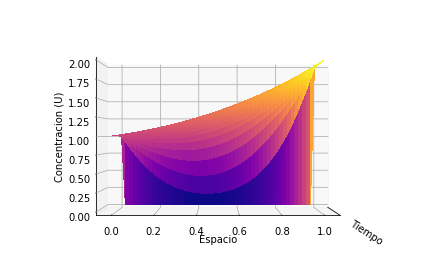

In [234]:
# ----- Plot contra espacio -----
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, T, U, alpha=1, linewidth=0,cmap=cm.plasma, antialiased=False)
ax.set_xticks([]) # Se quitan los valores de t en la grafica ya que no nos interesan
ax.view_init(0, 0) # Cambio de perspectiva
ax.set_xlabel('Tiempo')
ax.set_ylabel('Espacio')
ax.set_zlabel('Concentracion (U)')
plt.tight_layout()
plt.show()

# Problema 2:

Ahora supondremos que se colocan reguladores de presión, que permiten flujo de los gases desde los reservorios hacia el tubo inicialmente vacío $u(x,0) = 0$. En $x=0$, el flujo de gas es $\partial u/\partial x (0,t) = 0.1$ y en $x=1$ el flujo $\partial u/\partial x (1,t) = 0.2$.

Se pide realizar una simulación numérica de este escenario para $=0,..,10$

True


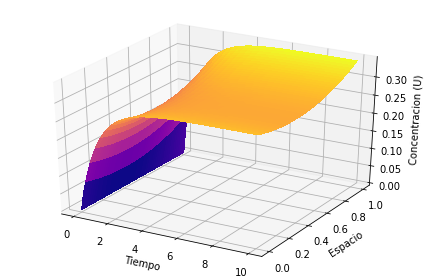

In [235]:
#http://people.bu.edu/andasari/courses/numericalpython/Week9Lecture15/PythonFiles/BTCS_NeumannBCs.py#
'''
Backward method to solve 1D reaction-diffusion equation:
    u_t = D * u_xx + alpha * u
    
with Neumann boundary conditions 
at x=0: u_x = sin(pi/2)
at x=L: u_x = sin(3*pi/4) with L=1
and initial condition u(x,0) = 4*x - 4*x**2
'''

M = 50 # GRID POINTS on space interval
N = 60 # GRID POINTS on time interval

x0 = 0 # Posicion inicial
xL = 1 # Posicion final (longitud)

# ----- Spatial discretization step -----
dx = (xL - x0)/(M - 1)

t0 = 0 # Tiempo inicial
tF = 10 # Tiempo final

# ----- Time step -----
dt = (tF - t0)/(N - 1)

D = 1  # Coeficiente de difusion
alpha = -1 # Coeficiente de reaccion

r = dt*D/dx**2
s = dt*alpha

a = 1 + 2*r - s

xspan = np.linspace(x0, xL, M)
tspan = np.linspace(t0, tF, N)

main_diag = (1 + 2*r - s)*np.ones((1,M))
off_diag = -r*np.ones((1, M-1))

a = main_diag.shape[1]

diagonals = [main_diag, off_diag, off_diag]

A = sparse.diags(diagonals, [0,-1,1], shape=(a,a)).toarray()
A[0,1] = -2*r
A[M-1,M-2] = -2*r

# Cambiamos U a U1,X a X1, T a T1, por cuestiones que mas adelante se necesita U2,X2,T2

# ----- Initializes matrix U -----
U1 = np.zeros((M, N))

#----- Condiciones Iniciales -----
U1[:,0] = 0 # u(x,0)

#----- Condiciones de frontera de Neumann -----
t = np.ones([N+1, 1]) # Cualquier t
f = 0.1*t # (0,t)
g = 0.2*t # (1,t)

for k in range(1, N):
    c = np.zeros((M-2,1)).ravel()
    b1 = np.asarray([2*r*dx*f[k], 2*r*dx*g[k]])
    b1 = np.insert(b1, 1, c)
    b2 = np.array(U1[0:M, k-1])
    b = b1 + b2  # Mano derecha
    U1[0:M, k] = np.linalg.solve(A,b)  # Solve x=A\b

# ----- Verificar que la solucion sea correcta:
gc = np.allclose(np.dot(A,U1[0:M,N-1]), b)
print(gc)

# ----- Surface plot -----
X1, T1 = np.meshgrid(tspan, xspan)

fig = plt.figure()
ax = fig.gca(projection='3d')

surf = ax.plot_surface(X1, T1, U1, linewidth=0,cmap=cm.plasma, antialiased=False)

#ax.set_yticks([0, 0.25, 0.5, 0.75, 1.0])
#ax.set_xticks([0, 0.05, 0.1, 0.15, 0.2])

ax.set_xlabel('Tiempo')
ax.set_ylabel('Espacio')
ax.set_zlabel('Concentracion (U)')
plt.tight_layout()
plt.show()

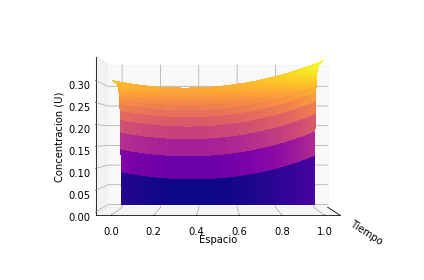

In [236]:
# ----- Plot contra espacio -----
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X1, T1, U1, alpha=1, linewidth=0,cmap=cm.plasma, antialiased=False)
ax.set_xticks([]) # Se quitan los valores de t en la grafica ya que no nos interesan
ax.view_init(0, 0) # Cambio de perspectiva
ax.set_xlabel('Tiempo')
ax.set_ylabel('Espacio')
ax.set_zlabel('Concentracion (U)')
plt.tight_layout()
plt.show()

# Problema 3:

¿Que pasaría en el caso de que se mezclaran dos gases que no reaccionan entre si, como sería mezclar dos recipientes con el mismo tipo de gas (el coeficiente de reacción $\alpha=0$)?.

Suponga que inicialmente el tubo está vacío $u(x,0)=0$ y la concentración en $u(0,t)=1$ y $u(1,t)=2$.

Resuelva numéricamente este caso.

True


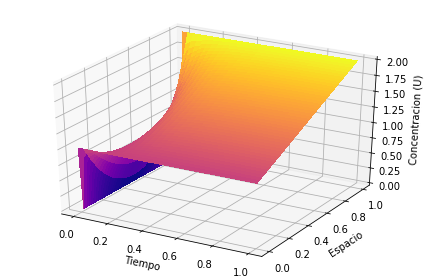

In [237]:
#http://people.bu.edu/andasari/courses/numericalpython/Week9Lecture15/PythonFiles/BTCS_DirichletBCs.py#
'''
Backward method to solve 1D reaction-diffusion equation:
    u_t = D * u_xx + alpha * u
    
with Dirichlet boundary conditions u(x0,t) = 0, u(xL,t) = 0
and initial condition u(x,0) = 4*x - 4*x**2
'''

M = 50 # GRID POINTS on space interval
N = 60 # GRID POINTS on time interval

x0 = 0 # Posicion inicial
xL = 1 # Posicion final (longitud)

# ----- Spatial discretization step -----
dx = (xL - x0)/(M - 1)

t0 = 0 # Tiempo inicial
tF = 1 # Tiempo final

# ----- Time step -----
dt = (tF - t0)/(N - 1)

D = 1  # Coeficiente de difusion
alpha = 0 # Coeficiente de reaccion

r = dt*D/dx**2
s = dt*alpha;

xspan = np.linspace(x0, xL, M)
tspan = np.linspace(t0, tF, N)

main_diag = (1 + 2*r - s)*np.ones((1,M-2))
off_diag = -r*np.ones((1, M-3))

a = main_diag.shape[1]

diagonals = [main_diag, off_diag, off_diag]

A = sparse.diags(diagonals, [0,-1,1], shape=(a,a)).toarray()

# Cambiamos U a U2,X a X2, T a T2, para poder graficar en el sig paso

# ----- Initializes matrix U -----
U2 = np.zeros((M, N))

# ----- Condicion inicial -----
U2[:,0] = 0 # u(x,0)

# ----- Condiciones de frontera de Dirichlet -----
U2[0,:] = 1.0 # u(0,t)
U2[-1,:] = 2.0 # u(1,t)

for k in range(1, N):
    c = np.zeros((M-4,1)).ravel()
    b1 = np.asarray([r*U[0,k], r*U2[-1,k]])
    b1 = np.insert(b1, 1, c)
    b2 = np.array(U2[1:M-1, k-1])
    b = b1 + b2  # Mano derecha
    U2[1:M-1, k] = np.linalg.solve(A,b)  # Resolver x=A\b

# ----- Checks if the solution is correct:
g = np.allclose(np.dot(A,U2[1:M-1,N-1]), b)
print(g)

# ----- Surface plot -----
X2, T2 = np.meshgrid(tspan, xspan)

fig = plt.figure()
ax = fig.gca(projection='3d')

surf = ax.plot_surface(X2, T2, U2, linewidth=0,cmap=cm.plasma, antialiased=False)

#ax.set_xticks([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])

ax.set_xlabel('Tiempo')
ax.set_ylabel('Espacio')
ax.set_zlabel('Concentracion (U)')
plt.tight_layout()
plt.show()

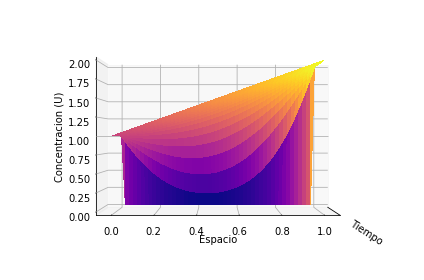

In [238]:
# ----- Plot contra espacio -----
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X2, T2, U2, alpha=1, linewidth=0,cmap=cm.plasma, antialiased=False)
ax.set_xticks([]) # Se quitan los valores de t en la grafica ya que no nos interesan
ax.view_init(0, 0) # Cambio de perspectiva
ax.set_xlabel('Tiempo')
ax.set_ylabel('Espacio')
ax.set_zlabel('Concentracion (U)')
plt.tight_layout()
plt.show()

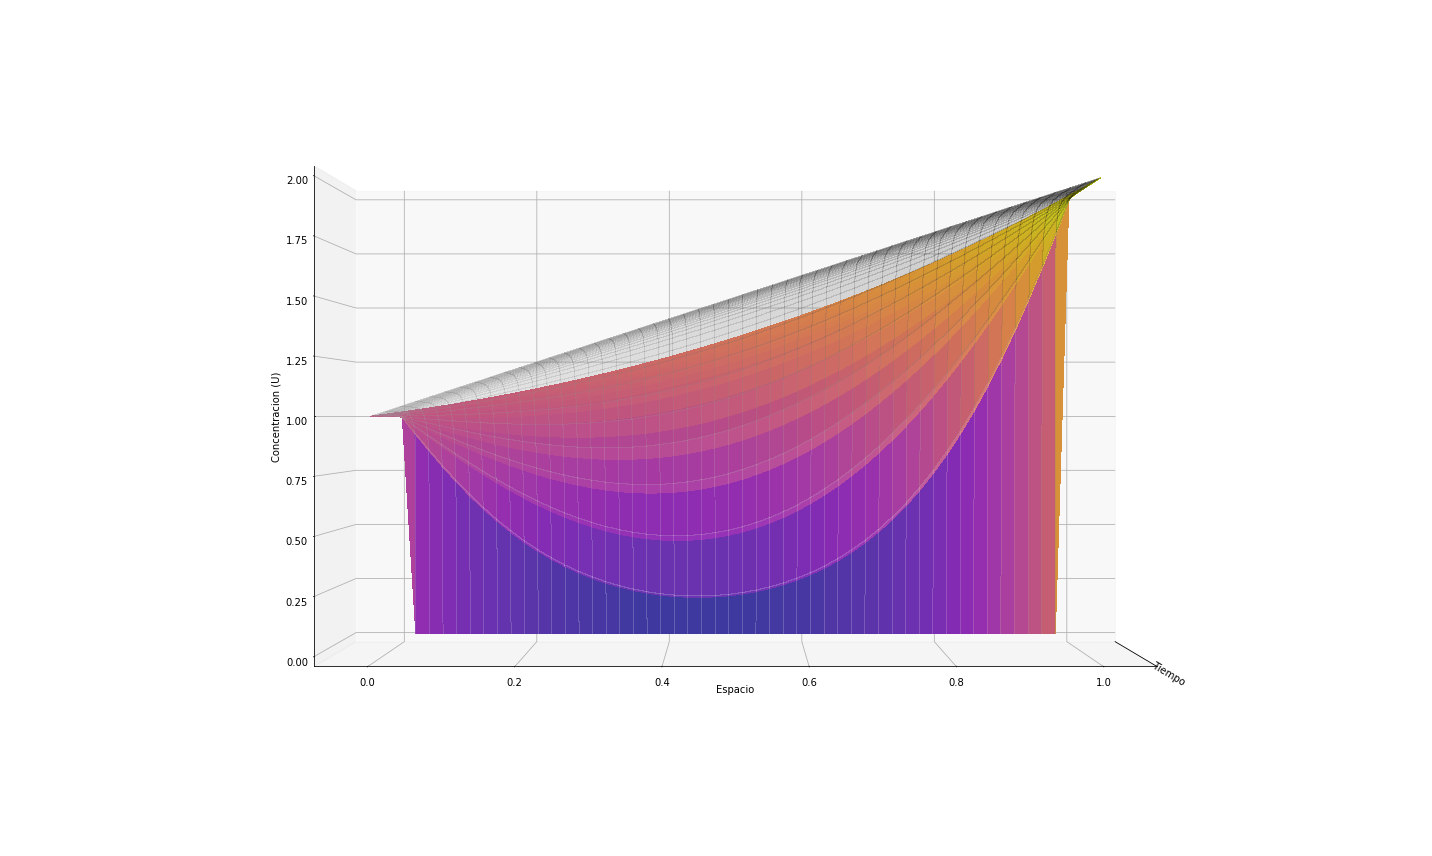

In [239]:
# ----- Plot comparativa -----
fig = plt.figure(figsize=(20,12))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, T, U, alpha=1, linewidth=0,cmap=cm.plasma, antialiased=False) # Ejercicio 1
surf = ax.plot_surface(X2, T2, U2, alpha=0.2, linewidth=0,cmap=cm.Greys, antialiased=False) # Ejercicio 3
ax.view_init(0, 0)
ax.set_xticks([]) # Se quitan los valores de t en la grafica ya que no nos interesan
ax.set_xlabel('Tiempo')
ax.set_ylabel('Espacio')
ax.set_zlabel('Concentracion (U)')
plt.tight_layout()
plt.show()